<a href="https://colab.research.google.com/github/kaki-pravallika/plant_disease_detection/blob/main/plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

data_dir = "/content/drive/MyDrive/project/PlantVillage"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")


In [ ]:
print(os.listdir(train_dir)[:5])
print(os.listdir(test_dir)[:5])


['Potato___Late_blight', 'Potato___healthy', 'Pepper__bell___healthy', 'Pepper__bell___Bacterial_spot', 'Potato___Early_blight']
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Tomato_Bacterial_spot']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt




In [ ]:
img_height, img_width = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 5796 images belonging to 15 classes.
Found 2918 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS
)


Epoch 1/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 3867s 21s/step - accuracy: 0.3527 - loss: 1.9874 - val_accuracy: 0.0000e+00 - val_loss: 6.8136
Epoch 2/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.7140 - loss: 0.8168 - val_accuracy: 0.0000e+00 - val_loss: 8.7778
Epoch 3/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.8226 - loss: 0.5232 - val_accuracy: 0.0000e+00 - val_loss: 10.4722
Epoch 4/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.8516 - loss: 0.4093 - val_accuracy: 0.0000e+00 - val_loss: 14.9478
Epoch 5/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.8786 - loss: 0.3430 - val_accuracy: 0.0000e+00 - val_loss: 14.5294
Epoch 6/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.9006 - loss: 0.2859 - val_accuracy: 0.0000e+00 - val_loss: 12.3491
Epoch 7/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.9114 - loss: 0.2472 - val_accuracy: 0.0000e+00 - val_loss: 18.2369
Epoch 8/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accurac

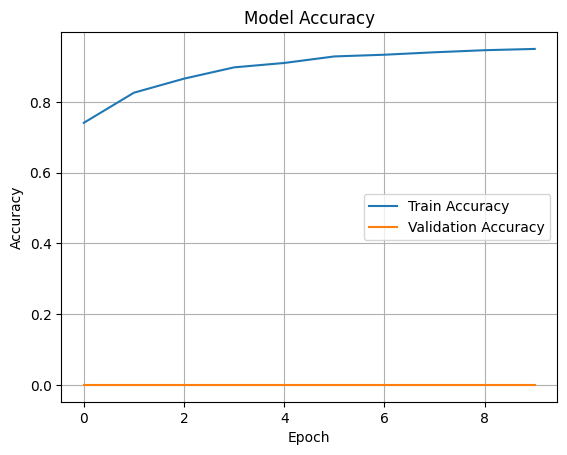

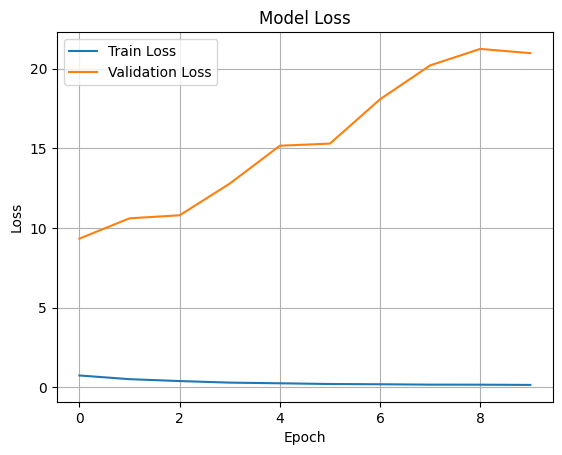

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Reset the generator to start from the first batch
test_generator.reset()

# Predict on the entire test set
pred = model.predict(test_generator, verbose=1)
predicted_class_indices = np.argmax(pred, axis=1)

# True labels that Keras stored
true_class_indices = test_generator.classes

# Build the label‑index ↔︎ name mapping **from the test generator**
# It's better to use the class_indices from the generator used to train the model
# to ensure all possible classes are included, even if they are not in the test set.
# Assuming train_generator has the correct mapping for all 15 classes.
label_map  = train_generator.class_indices          # {class_name: index}
inv_labels = {v: k for k, v in label_map.items()}  # {index: class_name}

# Create target_names in the correct order (0,1,2…) based on the full set of classes
target_names = [inv_labels[i] for i in range(len(inv_labels))]

all_class_labels = list(range(len(target_names)))


print(classification_report(true_class_indices,
                            predicted_class_indices,
                            target_names=target_names,
                            labels=all_class_labels)) # Add the labels parameter

68/68 ━━━━━━━━━━━━━━━━━━━━ 27s 390ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.00      0.00      0.00       0.0
                     Pepper__bell___healthy       0.00      0.00      0.00       0.0
                      Potato___Early_blight       0.00      0.00      0.00       0.0
                       Potato___Late_blight       0.00      0.00      0.00       0.0
                           Potato___healthy       0.00      0.00      0.00       0.0
                      Tomato_Bacterial_spot       0.00      0.00      0.00       0.0
                        Tomato_Early_blight       0.00      0.00      0.00       0.0
                         Tomato_Late_blight       0.00      0.00      0.00       0.0
                           Tomato_Leaf_Mold       0.00      0.00      0.00       0.0
                  Tomato_Septoria_leaf_spot       0.00      0.00      0.00       0.0
Tomato_Spider_mites_Tw

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [ ]:
import os

train_classes = sorted(os.listdir(train_dir))
test_classes  = sorted(os.listdir(test_dir))

print("Train classes:", len(train_classes), train_classes[:5], "…")
print("Test  classes:", len(test_classes),  test_classes[:5],  "…")

missing_in_test = [c for c in train_classes if c not in test_classes]
print("Classes missing in test:", missing_in_test)


Train classes: 15 ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy'] …
Test  classes: 15 ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy'] …
Classes missing in test: []


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

IMG_SIZE = 224
base = MobileNetV2(weights="imagenet", include_top=False,
                   input_shape=(IMG_SIZE, IMG_SIZE, 3))
base.trainable = False           # freeze backbone

x = GlobalAveragePooling2D()(base.output)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation="softmax")(x)
model = Model(base.input, output)

model.compile(optimizer=Adam(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=10)


Epoch 1/10


ValueError: Input 0 of layer "functional_2" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 128, 128, 3)